### kernels are used to transform the data into some higher dimensions

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

In [3]:
X, Y = make_circles(n_samples=400, shuffle=True, noise=0.05, random_state=3)

In [4]:
print(X.shape)
print(Y.shape)

(400, 2)
(400,)


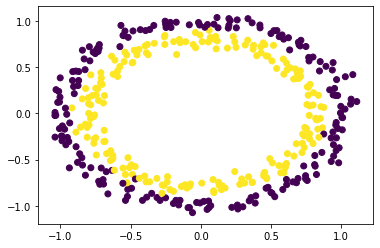

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=Y);

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression(solver='newton-cg')

In [10]:
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
lr.score(X_train, Y_train)

0.5035714285714286

In [12]:
lr.score(X_test, Y_test)

0.45

##### this is horrible accuracy

### Let's use SVM with kernels

In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC(gamma='auto')

In [15]:
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
svc.score(X_train, Y_train)

0.9892857142857143

In [17]:
svc.score(X_test, Y_test)

0.9666666666666667

### see the fucking difference in the accuuracy 

### now see the diff with linear kernel which is same as Logistic Regression

In [18]:
svc1 = SVC(kernel='linear', gamma='auto')

In [19]:
svc1.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
svc1.score(X_train, Y_train)

0.525

In [21]:
svc1.score(X_test, Y_test)

0.475

### grid search ! finding the right parameter

In [22]:
from sklearn.datasets import load_digits

In [23]:
digits = load_digits()

In [24]:
X = digits.data
Y = digits.target

In [25]:
print(X.shape, Y.shape)

(1797, 64) (1797,)


### Applying linear model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [27]:
model = LogisticRegression(solver='newton-cg', multi_class='auto')
model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
model.score(X, Y)

1.0

In [32]:
## apply svm
svc2 = SVC()
svc2.fit(X, Y)

/home/macab/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
svc2.score(X, Y)

1.0